# HW3

In [79]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

### 1
用蒙特卡罗试验来估计正态情况下的偏度  $\sqrt{b_{1}}$  的  0.025 、 0.05 、 0.95  和 0.975 分位数. 使用密度的 (具有精确方差公式的) 正态近似来计算式(2.14)中估计的标准误差.将估计分位数和大样本近似  $\sqrt{b_{1}} \approx N(0,6 / n)$  的分位数进行比较.
根据偏度在精确方差公式下的渐近正态分布, 有  $\sqrt{b_{1}} \rightarrow A N\left(0, \frac{6(n-2)}{(n+1)(n+3)}\right)$ , 且根据分位数经验估计方差公式 $ \operatorname{Var}\left(\hat{x}_{q}\right)=\frac{q(1-q)}{n f\left(x_{q}\right)^{2}}$ , 由此可以计算标准误差如下: (取 $ \mathrm{n}=10000 $, 将分位数估计值代入  $x_{q} $ )

In [80]:
#试验次数
m=10000
#样本量
n=1000
skew=np.zeros(m)
for j in range(m):
    x=np.random.randn(n)
    skew[j]=np.mean(((x-np.mean(x))/np.std(x))**3)
skew.sort()
print(f'样本量为{n}时，偏度的0.025、0.05、0.95和0.975分位数分别为：')
print([skew[int(m*0.025)],skew[int(m*0.05)],skew[int(m*0.95)],skew[int(m*0.975)]])

样本量为1000时，偏度的0.025、0.05、0.95和0.975分位数分别为：
[-0.15136704313676438, -0.12713119365926562, 0.12702282077529814, 0.15077220905105707]


In [81]:
#和Var(X_q)=q*(1-q)/(n*f(x_q)**2)比较,f为N(0,sigma)的密度函数,sigma=6*(n-2)/((n+1)*(n+3)),x_q为b1的分位数
q=np.array([0.025,0.05,0.95,0.975])
x_q=[skew[int(m*q[i])] for i in range(4)]
sigma=6*(n-2)/((n+1)*(n+3))
print(f'样本量为{n}时，偏度的0.025、0.05、0.95和0.975分位数的方差估计为：')
print(np.sqrt(q*(1-q)/(n*stats.norm.pdf(x_q,0,np.sqrt(sigma))**2)))
print(f'sqrt(b1)的渐进理论的分位数为：')
print(stats.norm.ppf(q,0,np.sqrt(6/n)))

样本量为1000时，偏度的0.025、0.05、0.95和0.975分位数的方差估计为：
[0.00652433 0.00517205 0.00516013 0.00642676]
sqrt(b1)的渐进理论的分位数为：
[-0.15181816 -0.12740981  0.12740981  0.15181816]


### 2
$\S 3.5$  给出了用模拟方法比较置信区间性能的步骤。设  $X \sim \mathrm{b}(1, p), X_{1}, X_{2}, \ldots, X_{n}$  为样本。令  $S_{0}=\sum_{i=1}^{n} X_{i}, \hat{p}=S_{0} / n=\frac{1}{n} \sum_{i=1}^{n} X_{i}$。用模拟方法比较如下五种置信区间:
(1) 利用正态近似。当  n  很大时$\frac{\hat{p}-p}{\sqrt{\frac{1}{n} \hat{p}(1-\hat{p})}}$近似服从  $\mathrm{N}(0,1)$ , 于是得置信区间$\hat{p} \pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{1}{n} \hat{p}(1-\hat{p})}$.
(2) 利用正态近似, 令$S^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left(X_{i}-\hat{p}\right)^{2}=\frac{n}{n-1} \hat{p}(1-\hat{p})$n很大时$\frac{\hat{p}-p}{\sqrt{\frac{1}{n} S^{2}}}$近似服从  $\mathrm{N}(0,1)$ , 于是得置信区间$\hat{p} \pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{1}{n} S^{2}}$
(3) Wilson 置信区间。
利用正态近似,  n  很大时$\frac{\hat{p}-p}{\sqrt{\frac{1}{n} p(1-p)}}$近似服从  $\mathrm{N}(0,1)$ , 解关于p的不等式$\left|\frac{\hat{p}-p}{\sqrt{\frac{1}{n} p(1-p)}}\right| \leq z_{1-\frac{\alpha}{2}}$,得置信区间 $ \left(\lambda=z_{1-\frac{\alpha}{2}}\right)$ $\frac{\hat{p}+\frac{\lambda^{2}}{2 n}}{1+\frac{\lambda^{2}}{n}} \pm \frac{\lambda \sqrt{\frac{\lambda^{2}}{4 n}+\hat{p}(1-\hat{p})}}{\sqrt{n}\left(1+\frac{\lambda^{2}}{n}\right)}$ .



(1)置信区间：$\hat{p} \pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{1}{n} \hat{p}(1-\hat{p})}$.

In [82]:
#试验数
m=10000
p=0.5
n=500
alpha=0.05

#写出正态分布N(0,1)的上alpha分位数和下alpha分位数
z1=stats.norm.ppf(1-alpha/2,0,1)#上alpha分位数
z2=stats.norm.ppf(alpha/2,0,1)#下alpha分位数
count=0
p_hat=np.zeros(m)
for j in range(m):
    X=np.random.binomial(1,p,n)
    p_hat[j]=np.mean(X)
    interval=p_hat[j]+z1*np.sqrt(p_hat[j]*(1-p_hat[j])/n)*np.array([-1,1])
    if interval[0]<=p<=interval[1]:
        count+=1
print(f'置信度为{count/m}')

置信度为0.9453


(2)置信区间：$\hat{p} \pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{1}{n} S^{2}}$

In [83]:
#试验数
m=10000
p=0.5
n=500
alpha=0.05
z=stats.norm.ppf(1-alpha/2,0,1)#N(0,1)上alpha分位数
count=0
for i in range(m):
    X=np.random.binomial(1,p,n)
    p_hat=np.mean(X)
    S2=np.sum((X-p_hat)**2)/(n-1)
    interval=p_hat+z*np.sqrt(S2/n)*np.array([-1,1])
    if interval[0]<=p<=interval[1]:
        count+=1
print(f'置信度为{count/m}')

置信度为0.9439


(3)置信区间：$ \left(\lambda=z_{1-\frac{\alpha}{2}}\right)$ $\frac{\hat{p}+\frac{\lambda^{2}}{2 n}}{1+\frac{\lambda^{2}}{n}} \pm \frac{\lambda \sqrt{\frac{\lambda^{2}}{4 n}+\hat{p}(1-\hat{p})}}{\sqrt{n}\left(1+\frac{\lambda^{2}}{n}\right)}$ .

In [84]:
#试验数
m=10000
p=0.5
n=500
alpha=0.05
lamda=stats.norm.ppf(1-alpha/2,0,1)
count=0
for j in range(m):
    X=np.random.binomial(1,p,n)
    p_hat=np.mean(X)
    mid=(p_hat+lamda**2/(2*n))/(1+lamda**2/n)
    interval=mid+lamda*np.sqrt(lamda**2/(4*n)+p_hat*(1-p_hat))/(np.sqrt(n)*(1+lamda**2/n))*np.array([-1,1])
    if interval[0]<=p<=interval[1]:
        count+=1
print(f'置信度为{count/m}')

置信度为0.9482


### 3
将例 6.9 中  t  检验的备择假设换成  $H_{1}: \mu \neq 500$  并保持显著水平  $\alpha=0.05 $ 不变, 绘制该检验的经验功效曲线.
问题为  $X_{1}, \ldots, X_{20} \sim N\left(\mu, \sigma^{2}\right) $, 考虑检验问题:  $H_{0}: \mu=500 ; H_{a}: \mu \neq 500 $由于此时考虑双边检验的功效, 因此在备择假设中选取一些 $ \theta_{1} $, 通过蒙特卡洛方法得到经验功效  $P_{\theta_{1}}\left(\right.  reject  \left.H_{0}\right)$ ,具体实现过程如下$ (在本题中 选取  \sigma=100 , 显著水平选为  \alpha=0.5  )$:

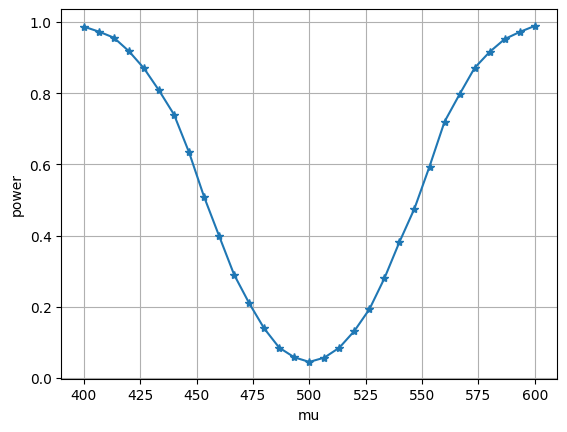

In [85]:
#蒙特卡洛估计假设检验功效
m = 1000 
n = 20
alpha = 0.05
mu0 = 500
sigma = 100
mu = mu0 + np.linspace(-100, 100, 31)
count = np.zeros(len(mu))

for _ in range(m):
    x = np.random.normal(mu0, sigma, n)
    x_mean = np.mean(x)
    se = stats.sem(x)  # 计算标准误差

    # 计算 t 统计量
    t_stats = (x_mean - mu) / se
    # 计算 p 值
    p_values = stats.t.sf(np.abs(t_stats), n-1) * 2  # 双尾检验

    # 对于每个 mu 值，如果 p 值小于 alpha，则在 count 中累加
    count += (p_values < alpha)

# 绘制功效曲线
plt.plot(mu, count / m,'*-')
plt.xlabel('mu')
plt.ylabel('power')
plt.grid()
plt.show()

### 4
实现一个随机游动Metropolis样本生成器来生成标准拉普拉斯(Laplace)分布 (参见练习3.2). 通过一个正态分布来模拟增量. 对由方差不同的建议分布所生成的链条进行比较. 此外, 计算每个链条的接受率.
按照题意, 选择建议分布为  $g\left(y \mid x_{t}\right)=\frac{1}{\sqrt{2 \pi \sigma^2 } } \exp \left\{-\frac{1}{2\sigma^2}\left(y-x_{t}\right)^{2}\right\} $, 以随机游走形式的 Metropolis 进行样本生成, 来生成目标分布:  $f(x)=\frac{1}{2} e^{-|x|}  $。选取建议分布的方差为  0.5,1,2,4 , 每次生成长度为 $ \mathrm{N}=2000$  的链条, 具体过程如下:


sigma=0.5时，接受率为0.842


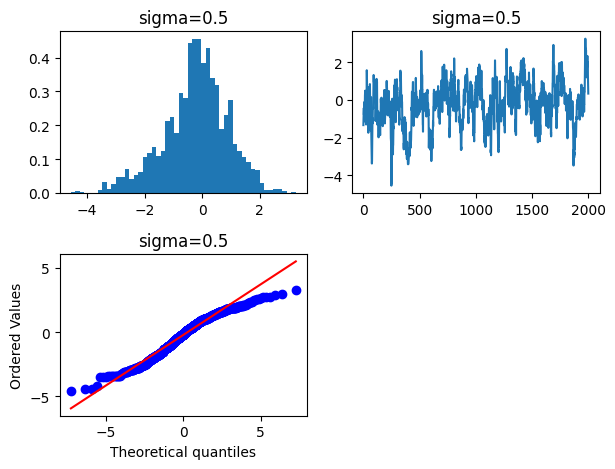

sigma=1时，接受率为0.6890000000000001


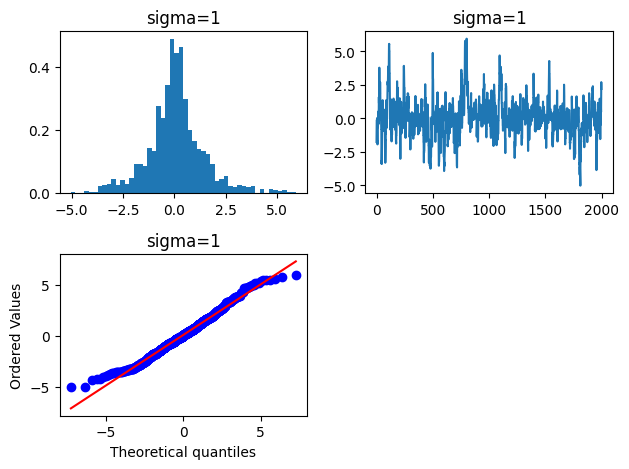

sigma=2时，接受率为0.5085


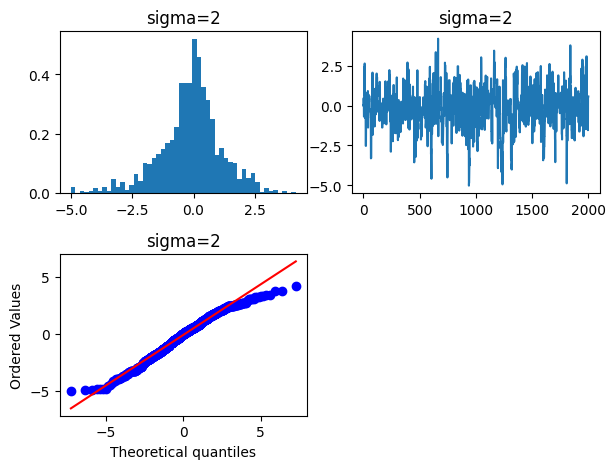

sigma=4时，接受率为0.35050000000000003


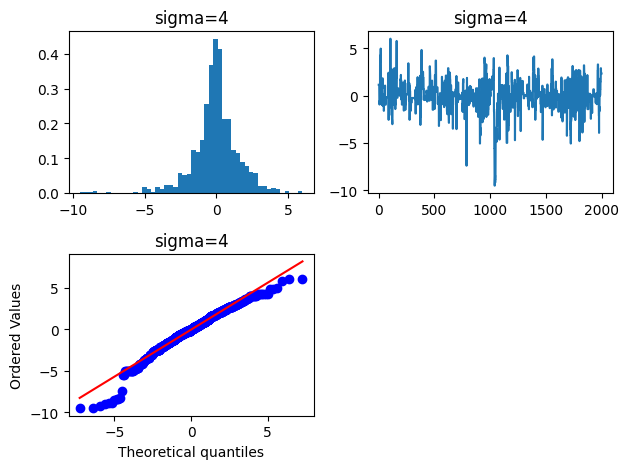

In [86]:
#MCMC采样
sigma=[0.5,1,2,4]
def proposal_pdf(y,x,sigma=1):#infact 正态分布
    return 1/np.sqrt(2*np.pi)*np.exp(-(y-x)**2/(2*sigma**2))
def target_pdf(x):
    return 1/2*np.exp(-np.abs(x))
m=2000

for k in range(len(sigma)):
    reg_count=0
    x=np.zeros(m)
    u=np.random.uniform(0,1,m)
    x[0]=np.random.normal(0,1)
    for j in range(1,m):
        xt=x[j-1]
        y=xt+np.random.normal(0,sigma[k])
        if u[j]<=min(1,target_pdf(y)/target_pdf(xt)):
            x[j]=y
        else:
            x[j]=xt
            reg_count+=1
    print(f'sigma={sigma[k]}时，接受率为{1-reg_count/m}')
    #直方图
    plt.subplot(2,2,1)
    plt.hist(x,bins=50,density=True)
    plt.title(f'sigma={sigma[k]}')
    
    plt.subplot(2,2,2)
    plt.plot(x)
    plt.title(f'sigma={sigma[k]}')
    
    plt.subplot(2,2,3)
    stats.probplot(x, dist='laplace', sparams=(0, 1), plot=plt)
    plt.title(f'sigma={sigma[k]}')
    
    plt.tight_layout()
    plt.show()

### 5
$\mathrm{Rao}$给出了一个关于四个纲 197 种动物的基因连锁的例子 (在文献  [67 ,  106,171,266]  中也有所讨论）. 群体大小为  (125,18,20,34) . 假设相应的多项分布的概率为
$$\left(\frac{1}{2}+\frac{\theta}{4}, \frac{1-\theta}{4}, \frac{1-\theta}{4}, \frac{\theta}{4}\right)$$
给定观测样本, 使用本章中的一种方法估计  $\theta $ 

根据题中的多项分布概率, 易知  $\theta \in[0,1]$ , 不妨设  $\theta $ 的先验分布为  $p_{0}(\theta) \sim U(0,1) $, 记  $\left(x_{1}, \ldots, x_{4}\right)$  为观测值, (本题中有  $\left.\left(x_{1}, \ldots, x_{4}\right)=(125,18,20,34)\right) $, 则  $\theta $ 的后验分布为:
$$f\left(\theta \mid x_{1}, \ldots, x_{4}\right) \propto p\left(x_{1}, \ldots, x_{4} \mid \theta\right) p_{0}(\theta) \propto(2+\theta)^{x_{1}}(1-\theta)^{x_{2}+x_{3}} \theta^{x_{4}} I_{(0,1)}(\theta)$$
设当前状态下  $\theta $ 的取值为$  \theta_{(t)} $, 
取建议分布为
(1)$g\left(y \mid \theta_{(t)}\right) \sim U(0,1)$ 
(2)$g\left(y \mid \theta_{(t)}\right) \sim N(\theta_{(t)},0.1)$ 
(3)$g\left(y \mid \theta_{(t)}\right) \sim U(\theta_{(t)}-0.1,\theta_{(t)}+0.1)$
运用 Metropolis-Hastings 算法。

具体实现如下 (取初始值为 0.25 , 链条长度取为  N=10000  ):

proposal_pdf g(y|x)=U(0,1)时
接受率为0.16800000000000004
对theta的估计为0.6236292536675789


proposal_pdf g(y|x)=N(theta,0.1)时
接受率为0.507
对theta的估计为0.6228024422765496

proposal_pdf g(y|x)=U(theta-0.1,theta+0.1)时
接受率为0.6407
对theta的估计为0.6237159873365724


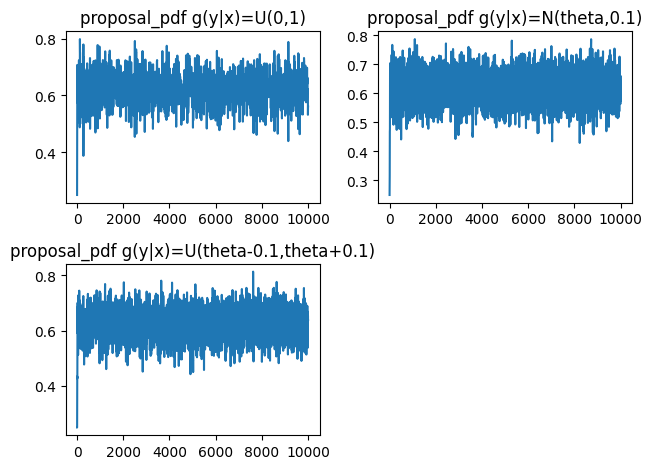

In [88]:
m=10000
u=np.random.uniform(0,1,m)
theta=np.zeros(m)
theta[0]=0.25
def funtion(theta,sample):
    return (2+theta)**sample[0]*(1-theta)**(sample[1]+sample[2])*(theta)**sample[3]
sample=np.array([125,18,20,34])

#假设先验为均匀分布
#proposal_pdf g(y|x)=U(0,1)
for k in range(3):
    reg_count=0
    for j in range(1,m):
        theta_star=theta[j-1]
        if k==0:
            y=np.random.uniform(0,1)
        elif k==1:
            y=np.random.normal(0,0.1)+theta_star
        else:
            y=np.random.uniform(-0.1,0.1,1)+theta_star
        if u[j]<=min(1,funtion(y,sample)/funtion(theta_star,sample)):
            theta[j]=y
        else:
            theta[j]=theta_star
            reg_count+=1
    print(f'proposal_pdf g(y|x)={["U(0,1)","N(theta,0.1)","U(theta-0.1,theta+0.1)"][k]}时')
    print(f'接受率为{1-reg_count/m}')
    print(f'对theta的估计为{np.mean(theta[100:])}\n\n')
    plt.subplot(2,2,k+1)
    plt.plot(theta)
    plt.title(f'proposal_pdf g(y|x)={["U(0,1)","N(theta,0.1)","U(theta-0.1,theta+0.1)"][k]}')
    
plt.tight_layout()
plt.show()